# Video Games Sales Data Analysis

In this Jupyter notebook we will discuss on the sales of games all around the world, on diffrent types of platform , and the ratings given by the users and the critics.

This datasheet is a csv file which is downloaded from Kaggle [video-game-sales](http://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset).

So here I'll be extracting some information from this datasheet which would be benificial in providing a good idea about the games sales, And the tools which I will be using are pandas, matplotlib, and seaborn to manage the datasheet and plot graphs out of it to visualize the data.

And all the tools mentioned above I have learned from --> [the course](http://zerotopandas.com).

## Downloading the Dataset

*Lets download the video games sales dataset from Kaggle.*


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohan0306
Your Kaggle Key: ········


100%|██████████| 507k/507k [00:00<00:00, 74.7MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogames-sales-dataset'

In [5]:
import os
os.listdir(data_dir)

['PS4_GamesSales.csv',
 'XboxOne_GameSales.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Video-games-sales-data-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [25]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Data Preparation and Cleaning

*In this step we will be preparing the data sheet in most usable form by filtering and cleaning the data.* 



In [26]:
import pandas as pd

In [27]:
games_df = pd.read_csv(data_dir + '/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [28]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


 ### There are total 16719 rows and 16 columns in this data sheet


In [29]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [30]:
games_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [31]:
games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [32]:
missing_names = (games_df[games_df['Name'].isna() == True])
missing_names

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
games_df.drop(games_df.index[659],inplace = True)

In [34]:
games_df.drop(games_df.index[14246],inplace = True)

In [35]:
games_df.loc[656:660]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
656,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40,NaN,NaN,9.0,90.0,Bullfrog Productions,K-A
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,NaN,NaN,Konami Computer Entertainment Hawaii,E
658,Monopoly,PC,1994.0,Misc,Hasbro Interactive,1.49,0.81,0.00,0.10,2.39,NaN,NaN,NaN,NaN,NaN,NaN
660,Guitar Hero,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38,91.0,65.0,8.7,173.0,Harmonix Music Systems,T


In [36]:
games_df.loc[14244:14250]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14244,Backyard NFL Football 2006,GBA,2005.0,Sports,Atari,0.02,0.01,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
14245,Superstars V8 Racing,PS3,2009.0,Racing,Black Bean Games,0.00,0.02,0.00,0.01,0.03,66.0,29.0,4.9,9.0,Milestone S.r.l,E
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
14248,Mashiro Iro Symphony: *mutsu-no-hana,PSP,2011.0,Adventure,Comfort,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
14249,Monster Guardians,GBA,2001.0,Role-Playing,Konami Digital Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
14250,Sunday vs Magazine Shuuketsu! Choujou Daikessen,PSP,2009.0,Fighting,Konami Digital Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


### There were two rows in which names of games were missing . So those rows are deleted.


In [64]:
print(games_df.isna().any(),'\n')
print(games_df.isna().sum(),'\n')

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool 

Name                  1
Platform              0
Year_of_Release     269
Genre                 1
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         9127
User_Count         9127
Developer          6621
Rating             6767
dtype: int64 



In [38]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
games_df.loc[games_df.Publisher.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3755,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4127,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+
4508,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4615,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Exploratory Analysis and Visualization

 *Here we will be analysing the cleaned data and will plot some graphs for visualization.*



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Lets determine the top 10 publishers Globally.

In [52]:
top_publisher = games_df['Publisher'].value_counts().head(10).sort_values(ascending=False)
top_publisher

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               938
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             638
Take-Two Interactive             422
Name: Publisher, dtype: int64

<AxesSubplot:title={'left':'Top 10 Publishers'}, xlabel='Game count', ylabel='Publisher'>

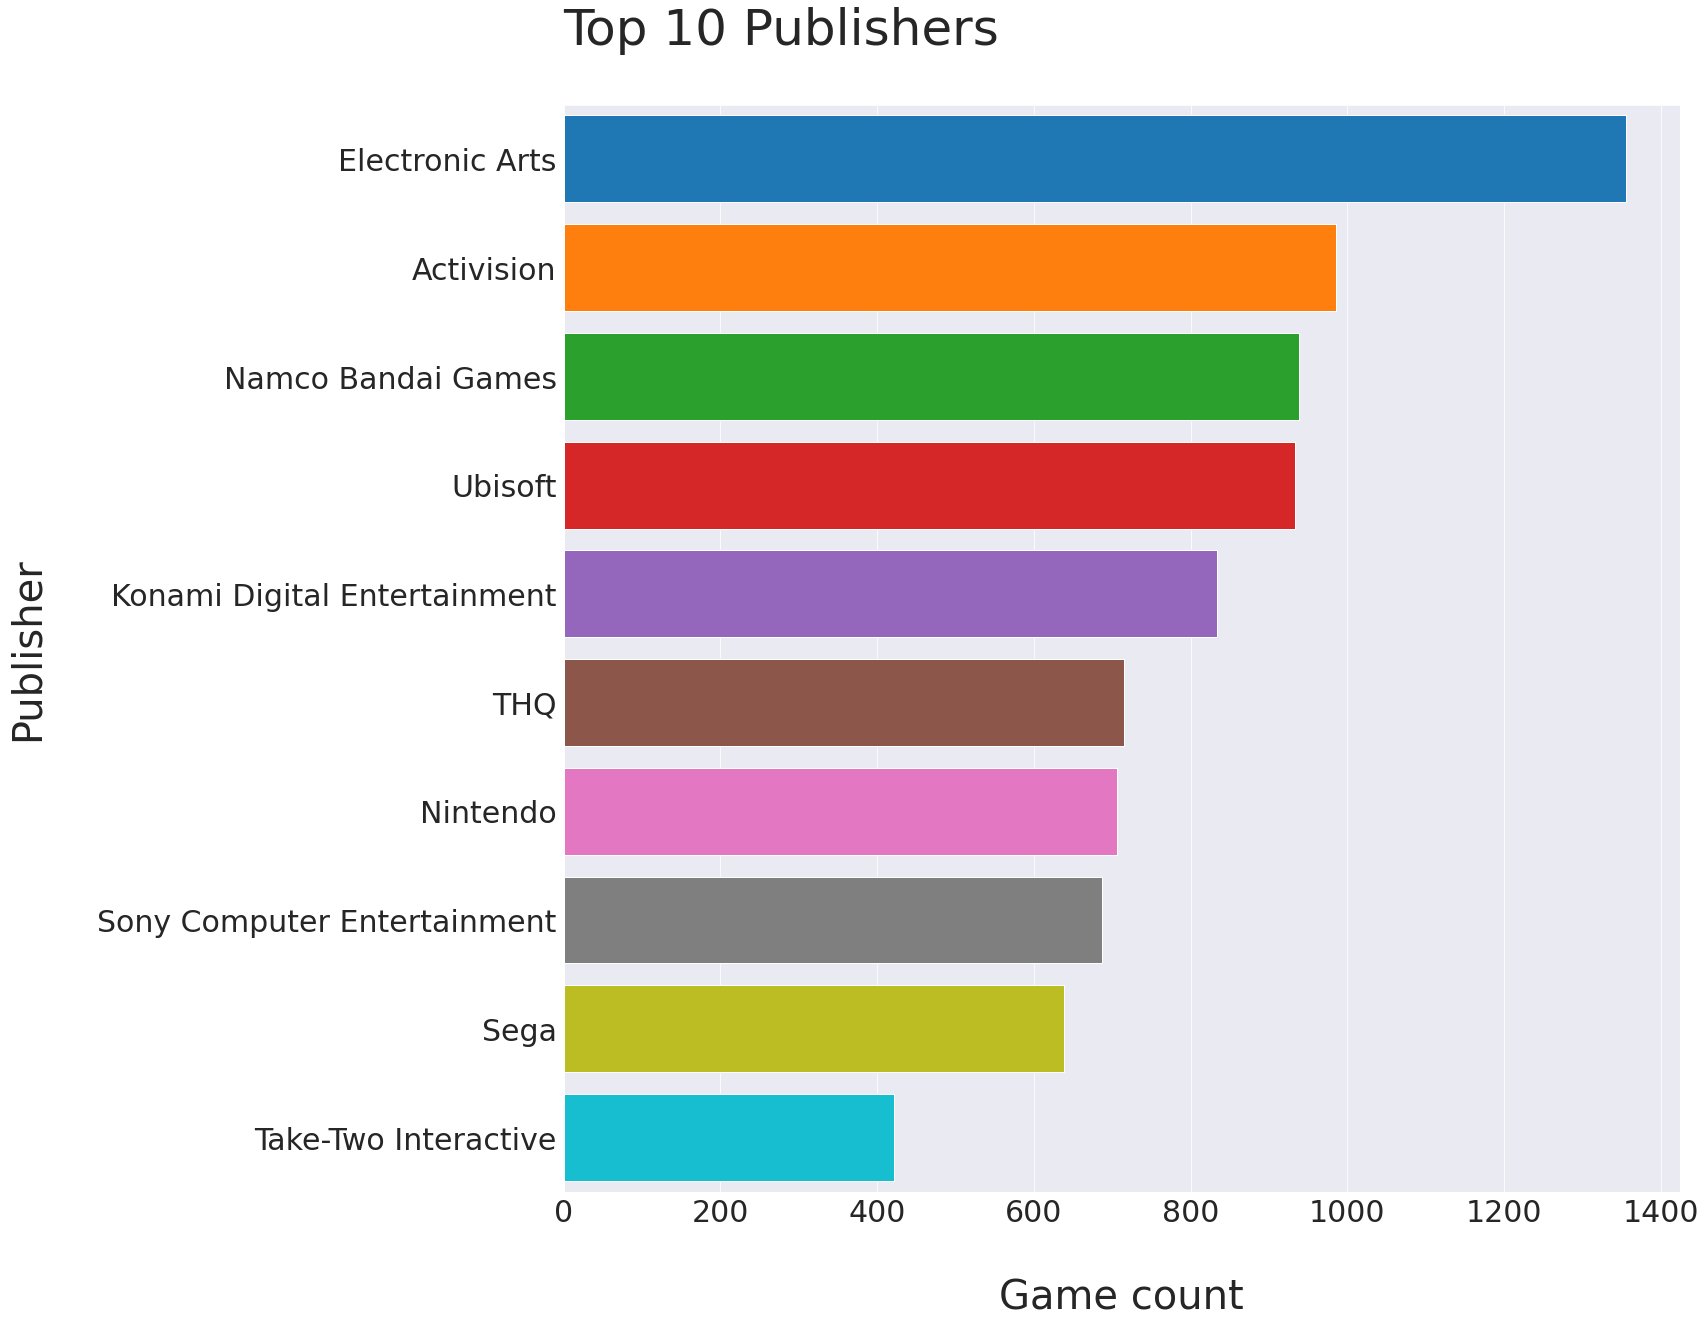

In [71]:
plt.figure(figsize=(20,20))
plt.title("Top 10 Publishers", pad = 60, loc='left', fontdict={'fontsize':50})
plt.xlabel("Game count", labelpad=50, fontdict={'fontsize':40})
plt.ylabel("Publisher", labelpad=50, fontdict={'fontsize':40})
plt.rcParams['font.size']=30

sns.barplot(y = top_publisher.index, x = top_publisher.values, saturation = 1)

### From the above plot it can be seen that 'Electronic Arts' tops the list with around 1400 Games.

### Now lets determine the top 10 Gaming Platforms Globally.

In [67]:
top_platforms = games_df['Platform'].value_counts().head(10).sort_values(ascending=False)
top_platforms

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64

<AxesSubplot:title={'center':'Top 10 Platforms'}, xlabel='Game count', ylabel='Platform'>

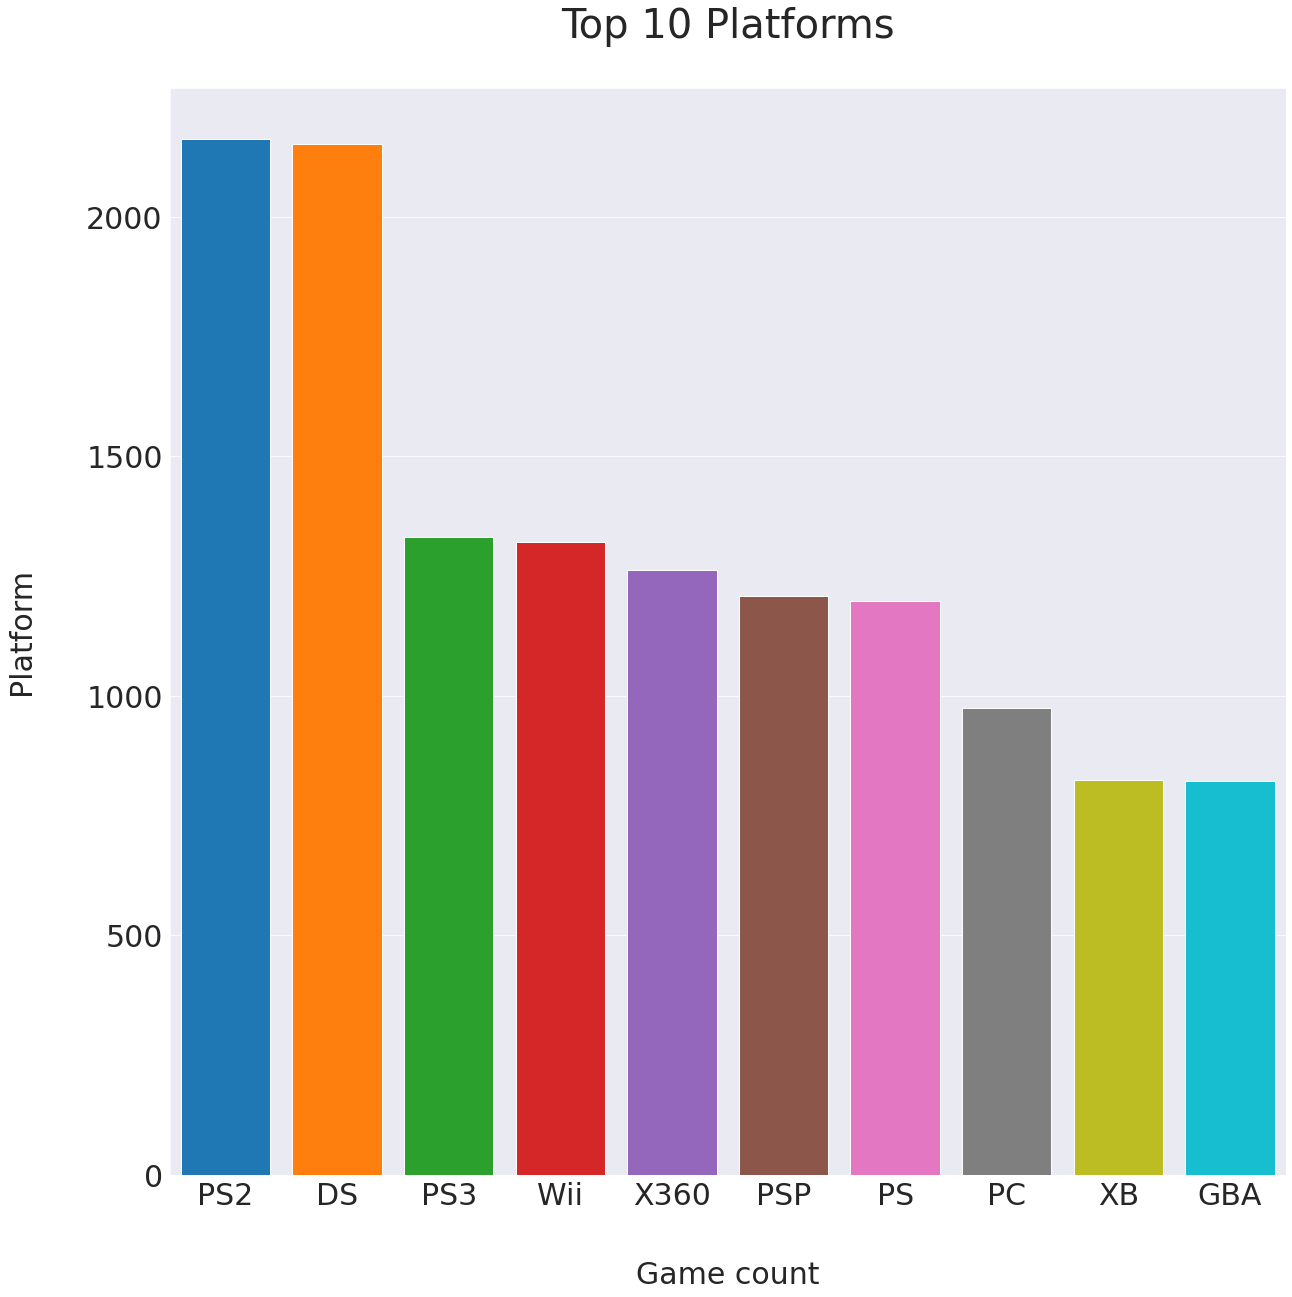

In [72]:
plt.figure(figsize=(20,20))
plt.title("Top 10 Platforms", pad=50, fontdict={'fontsize':40})
plt.xlabel("Game count", labelpad=50, fontdict={'fontsize':30})
plt.ylabel("Platform", labelpad=50, fontdict={'fontsize':30})

sns.barplot(y = top_platforms.values, x = top_platforms.index, saturation = 1)

### From the above plot it can be seen that 'PS2' and 'DS' tops the list with more than 2000 Games.

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Asking and Answering Questions

#### In this section we'll be asking some questions for what we see in the dataset and answer them.



#### Q1 : What are the global sales of games between 1980-2020 ?

In [75]:
games_sales = games_df.groupby(['Year_of_Release'])['Global_Sales'].sum()
games_sales

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     46.01
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.48
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Global Sales per Million')

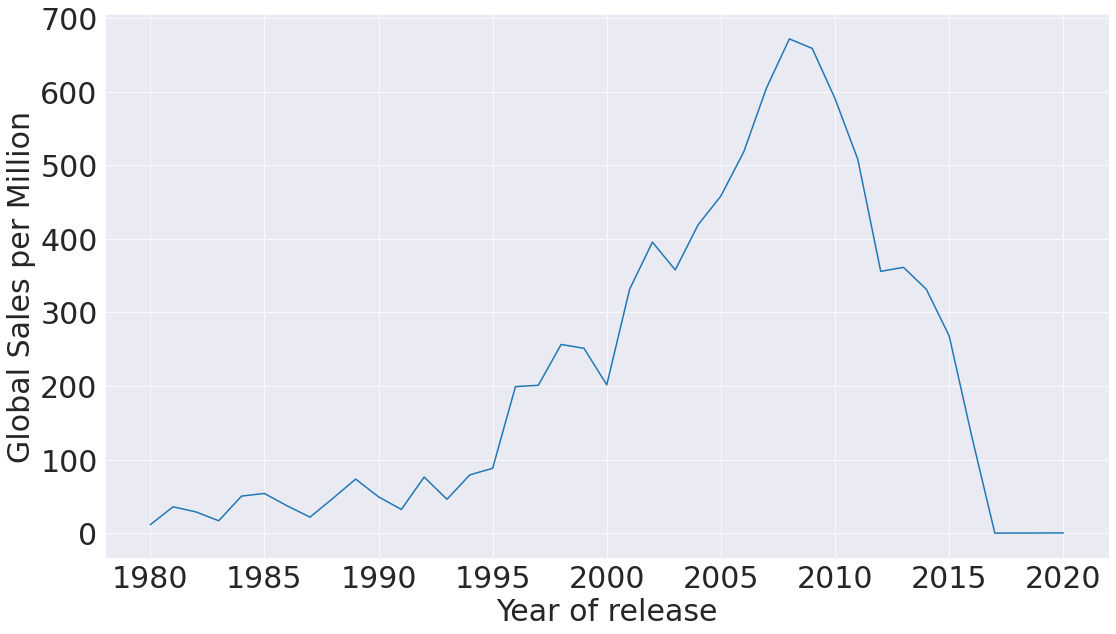

In [77]:
plt.figure(figsize=(18, 10))
plt.plot(games_sales);
plt.xlabel('Year of release')
plt.ylabel('Global Sales per Million')

### The above plot is about the Global sales per million from the year 1980-2020. We can see that the sales of games was increasing gradually till 1995, then after 1995 they increased exponentially for almost 10 years. And then from 2010 it dipped.

#### Q2: Analyse total games genre

In [79]:
genre_counts = games_df['Genre'].value_counts()
genre_counts

Action          3369
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

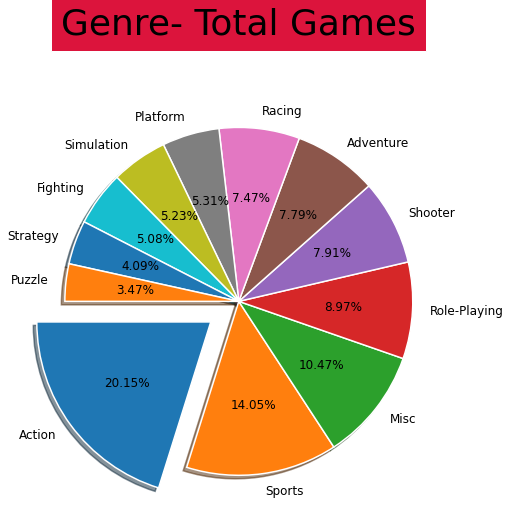

In [82]:
plt.rcParams['text.color'] = '#000000'
plt.figure(figsize=(20,8))
plt.title('Genre- Total Games', pad = 50, bbox={'facecolor':'#DC143C', 'pad':10})
plt.pie(genre_counts, labels=genre_counts.index, autopct='%0.2f%%', shadow=True, startangle=180, 
        explode=(0.2,0,0,0,0,0,0,0,0,0,0,0),textprops={'fontsize': 12}, wedgeprops = {'linewidth': 1.5});

### The above pie chart shows all the genres of games. And as we can see that the most games are on the genre 'Action' and then followed by 'Sports'.

#### Q3: What are the total number of games released yearly?

In [83]:
games_released = games_df.groupby(['Year_of_Release'])['Global_Sales'].count()

<AxesSubplot:title={'center':'Game Releases Per Year'}, xlabel='Year_of_Release', ylabel='Number of Games'>

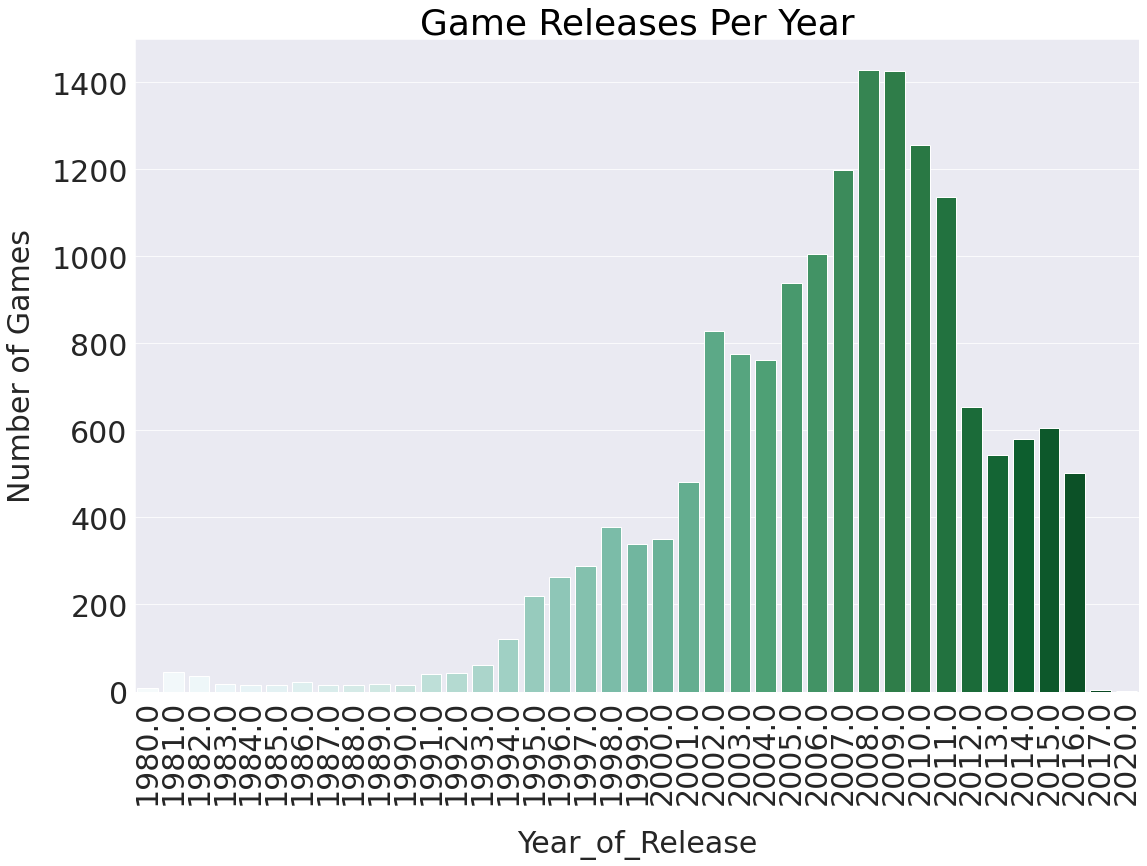

In [85]:
plt.figure(figsize=(18,12))
plt.title("Game Releases Per Year")
plt.xticks(rotation=90)
plt.ylabel('Number of Games', labelpad=15)
plt.xlabel('Years', labelpad=25)

no_of_games = games_released.index
year_released = games_released.values

sns.barplot(x = no_of_games, y = year_released, palette='BuGn')

### The above graph is about Game release yearly from 1980-2020. In the beginning of 10 years till 1990 the release where constant, from there it increased rapidly. And, from the year 2009 it gradually fell.

#### Q4: Analyse the sales of games by genre and religion .

In [90]:
regional_df = games_df.groupby('Genre').sum().sort_values('Global_Sales', ascending=False).drop(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count','User_Score'], axis=1)

In [91]:
regional_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,879.01,519.13,161.41,184.60,1745.24
Sports,684.43,376.79,135.54,134.51,1332.00
Shooter,592.24,317.34,38.76,104.11,1052.94
Role-Playing,330.81,188.71,355.46,59.63,934.40
Platform,445.50,200.35,130.83,51.09,828.08
Misc,407.27,212.74,108.11,74.39,803.18
Racing,359.35,236.51,56.71,76.10,728.90
Fighting,223.36,100.33,87.48,36.36,447.48
Simulation,182.19,113.52,63.80,30.75,390.42


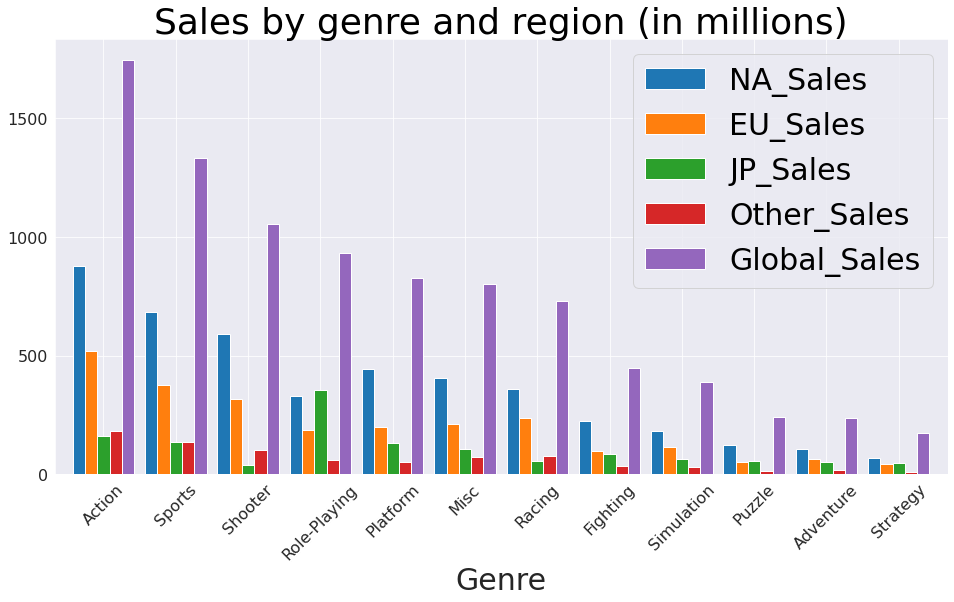

In [92]:
regional_df.plot(kind='bar', figsize = (16,8), rot=45, fontsize=16, grid=True, width=0.85);
plt.title('Sales by genre and region (in millions)')
plt.show()

### The above graph shows the  Sales of Games by genre Globally. As we see that 'Action' games tops the list to sold the most followed by 'Sports' games.

#### Q5: Analyse Global sales vs critic rating

<AxesSubplot:title={'center':'Global Sales vs critic rating'}, xlabel='Years', ylabel='Global Sales'>

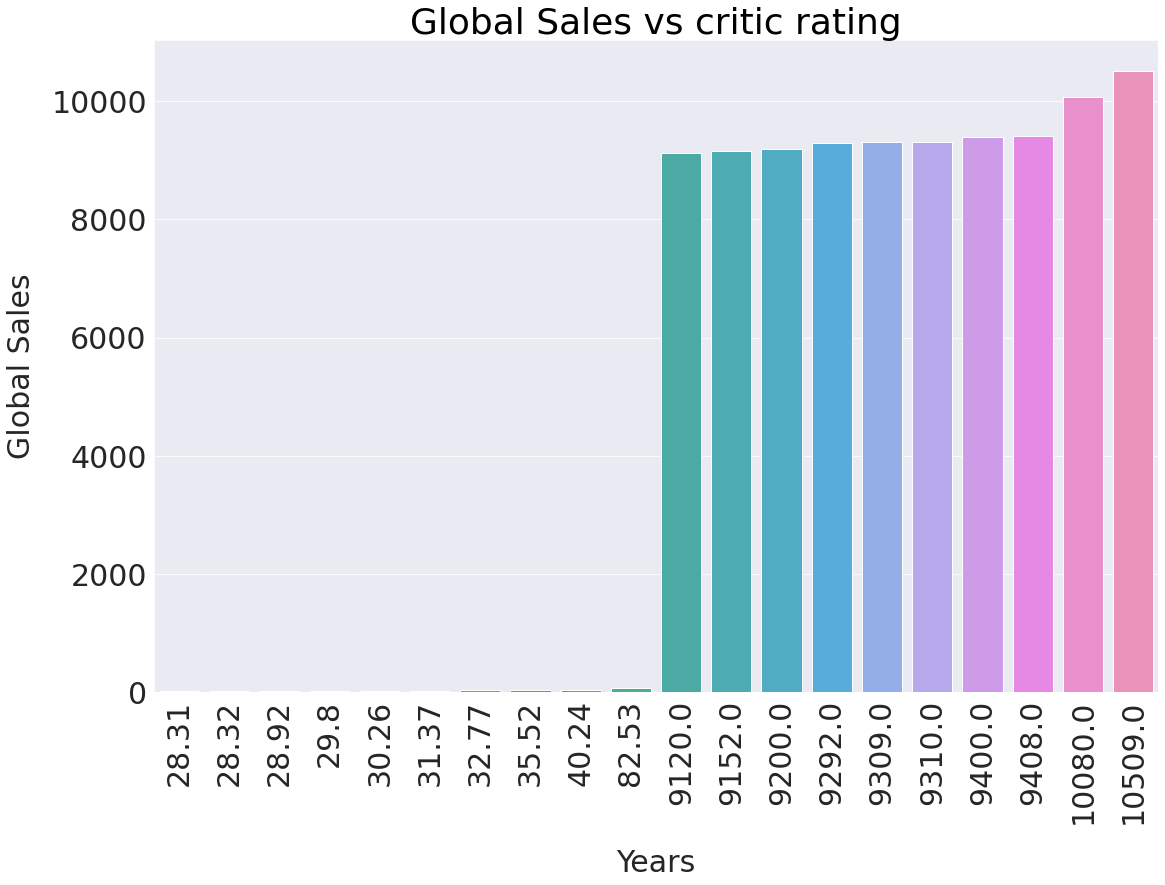

In [96]:
critic_rating_df = (games_df['Critic_Count']*games_df['Critic_Score']).sort_values(ascending=False).head(10)
gb_sales_rating_df = games_df['Global_Sales'].sort_values(ascending=False).head(10)

critic_gb_df = pd.concat([gb_sales_rating_df, critic_rating_df], axis=0)


plt.figure(figsize=(18,12))
plt.title("Global Sales vs critic rating")
plt.xticks(rotation=90)
plt.ylabel('Global Sales', labelpad=15)
plt.xlabel('Years', labelpad=25)
sns.barplot(data = critic_gb_df, x = critic_gb_df.index, y = critic_gb_df.values)

In [106]:
import jovian

In [107]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## Inferences and Conclusion

#### Now lets conclude the analysed dataset of video games sales.

#### On the basis of the analysis of the video games sales dataset we can come to the following conclusions : 

- The video game industry is the economic sector involved in the development, marketing, and monetization of video games. It encompasses dozens of job disciplines and its component parts employ thousands of people worldwide. On the basis the dataset acquired we present certain insights about what we have learned.

- Starting early 2000's the games sales in years and the game releases concurrently have seen and remarkable upsurge of the gowring gaming community.

- On the basis the comparison between count of games between the publisher & record of publisher with global sale value, Nintendo and Electronic Arts have dominance in count and record sale area respectively.

- Nintendo ranks the charts in top unique publishers with 1800 million$ in game sales until 2017. Sale value comprises of revenue from multiple platforms within Nintendo.

- Action in genre scored the maximum weightage of 20 percent as compared to other genres. But, yes the other genres will tend to grow as the subscriber base of video-game enthusiast is growing community each year.

- Action is also the leading genre terms of Global sale across the regions wherein NA has the maximum sales.

- Unique platform for the games in stand off with Play Station 2 scoring the top chart in terms of sales and most rated gaming console follows by the other most liked XBOX 360, PS3, Wii, DS(Nintendo).

In [108]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'

## References and Future Work

This dataset has a lot of information about the sales trend of video games which can be further exploited to gain useful insights.

I would like to thank Jovian.ml for such an helpful course .


References:

- Kaggle Datasets : https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset 
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [110]:
import jovian

In [111]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rohanj0306/video-games-sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rohanj0306/video-games-sales-data-analysis


'https://jovian.ai/rohanj0306/video-games-sales-data-analysis'